In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [32]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D

In [3]:
DATA_PATH = '/Users/megantabbutt/BRT_data/GeoData/'
DATA_PATH_Dems = '/Users/megantabbutt/BRT_data/DemographicData/'

RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
CitiesShapeFile = "Shapes/City/City_Limit.shp"
LakesShapeFile = "Shapes/Lakes/Lakes_and_Rivers.shp"
StreetsShapeFile = "Shapes/Street/Street_Centerlines_and_Pavement_Data.shp"


cityShapes_df = geopandas.read_file(CitiesShapeFile)
lakeShapes_df = geopandas.read_file(LakesShapeFile)
streetShapes_df = geopandas.read_file(StreetsShapeFile)

In [4]:
df = geopandas.read_file(DATA_PATH+"tl_2018_55_bg.shp")

In [5]:
df_dane = df[df['COUNTYFP'] == "025"]
df_dane.head(3)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104..."
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058..."
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041..."


In [6]:
df_mad = pd.read_csv(DATA_PATH_Dems + "timeToWork_race_2018.txt", sep='\t')
df_mad.info()
df_mad.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 25 columns):
 #   Column                                                                               Non-Null Count  Dtype
---  ------                                                                               --------------  -----
 0   GEOID                                                                                310 non-null    int64
 1   Estimate!!Total                                                                      310 non-null    int64
 2   Estimate!!Total!!Population of one race                                              310 non-null    int64
 3   Estimate!!Total!!Population of one race!!White                                       310 non-null    int64
 4   Estimate!!Total!!Population of one race!!Black or African American                   310 non-null    int64
 5   Estimate!!Total!!Population of one race!!American Indian and Alaska Native           310 non-null    int64

,GEOID,Estimate!!Total,Estimate!!Total!!Population of one race,Estimate!!Total!!Population of one race!!White,Estimate!!Total!!Population of one race!!Black or African American,Estimate!!Total!!Population of one race!!American Indian and Alaska Native,Estimate!!Total!!Population of one race!!Asian alone,Estimate!!Total!!Population of one race!!Native Hawaiian and Other Pacific Islander,Estimate!!Total!!Population of one race!!Some other race,Estimate!!Total!!Population of two or more races,...,Estimate!!Total!!6 30 a.m. to 6 59 a.m.,Estimate!!Total!!7 00 a.m. to 7 29 a.m.,Estimate!!Total!!7 30 a.m. to 7 59 a.m.,Estimate!!Total!!8 00 a.m. to 8 29 a.m.,Estimate!!Total!!8 30 a.m. to 8 59 a.m.,Estimate!!Total!!9 00 a.m. to 9 59 a.m.,Estimate!!Total!!10 00 a.m. to 10 59 a.m.,Estimate!!Total!!11 00 a.m. to 11 59 a.m.,Estimate!!Total!!12 00 p.m. to 3 59 p.m.,Estimate!!Total!!4 00 p.m. to 11 59 p.m.
0,550250121001,710,706,698,0,0,8,0,0,4,...,80,78,55,28,8,6,3,0,34,2
1,550250127002,1781,1767,1757,0,0,10,0,0,14,...,130,125,161,109,51,58,9,2,55,17
2,550250121002,914,908,908,0,0,0,0,0,6,...,42,76,103,46,6,11,0,8,12,42


In [7]:
geoIDs_Master = [int(i) for i in list(df_dane['GEOID'])]
type(geoIDs_Master[0])

int

In [9]:
densityWhite = dict()
for ID in geoIDs_Master:
    totalPeople = df_mad.loc[df_mad['GEOID'] == ID, 'Estimate!!Total'].item()
    whitePeople = df_mad.loc[df_mad['GEOID'] == ID, 'Estimate!!Total!!Population of one race!!White'].item()
    #print(totalPeople, whitePeople)
    if totalPeople > 0:
        number = whitePeople/totalPeople        
    else:
        number = None
    densityWhite[ID] = number
    
densityWhite

{550250020001: 0.8322916666666667,
 550250013001: 0.8604143947655398,
 550250014011: 0.5956175298804781,
 550250014012: 0.36684782608695654,
 550250014013: 0.37659574468085105,
 550250014014: 0.2606965174129353,
 550250014022: 0.7961696306429549,
 550250014023: 0.40390173410404623,
 550250014024: 1.0,
 550250015012: 0.881578947368421,
 550250015021: 0.353125,
 550250015023: 0.6614173228346457,
 550250017052: 0.8961424332344213,
 550250018022: 0.8446666666666667,
 550250019001: 0.8976744186046511,
 550250019002: 0.9363295880149812,
 550250019003: 0.9366013071895425,
 550250019004: 0.8,
 550250019005: 0.956386292834891,
 550250021002: 0.957131079967024,
 550250020002: 0.800314465408805,
 550250020003: 0.9283429302623161,
 550250020004: 0.8123195380173244,
 550250021001: 0.8122448979591836,
 550250021004: 0.8879142300194932,
 550250022002: 0.6510025062656641,
 550250029003: 0.9296442687747035,
 550250023011: 0.3336673346693387,
 550250023012: 0.7756686798964625,
 550250024011: 0.712643678

In [18]:
densityBlack = dict()
for ID in geoIDs_Master:
    totalPeople = df_mad.loc[df_mad['GEOID'] == ID, 'Estimate!!Total'].item()
    blackPeople = df_mad.loc[df_mad['GEOID'] == ID, 'Estimate!!Total!!Population of one race!!Black or African American'].item()
    #print(totalPeople, whitePeople)
    if totalPeople > 0:
        number = blackPeople/totalPeople        
    else:
        number = None
    densityBlack[ID] = number
    
densityBlack

{550250020001: 0.06354166666666666,
 550250013001: 0.05779716466739367,
 550250014011: 0.08565737051792828,
 550250014012: 0.19927536231884058,
 550250014013: 0.2251063829787234,
 550250014014: 0.22587064676616916,
 550250014022: 0.1436388508891929,
 550250014023: 0.17810693641618497,
 550250014024: 0.0,
 550250015012: 0.047697368421052634,
 550250015021: 0.375,
 550250015023: 0.06915439917836358,
 550250017052: 0.015578635014836795,
 550250018022: 0.06733333333333333,
 550250019001: 0.026976744186046512,
 550250019002: 0.009737827715355805,
 550250019003: 0.00784313725490196,
 550250019004: 0.16104868913857678,
 550250019005: 0.024143302180685357,
 550250021002: 0.03297609233305853,
 550250020002: 0.05817610062893082,
 550250020003: 0.015355086372360844,
 550250020004: 0.12078922040423484,
 550250021001: 0.1346938775510204,
 550250021004: 0.05847953216374269,
 550250022002: 0.28132832080200504,
 550250029003: 0.048221343873517786,
 550250023011: 0.43286573146292584,
 550250023012: 0.0

In [20]:
df_dane['densityWhite'] = list(densityWhite.values())
df_dane['densityBlack'] = list(densityBlack.values())
df_dane.head(3)

/Users/megantabbutt/Library/Python/3.8/lib/python/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,densityWhite,densityBlack
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104...",0.832292,0.063542
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058...",0.860414,0.057797
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041...",0.595618,0.085657


In [11]:
route_freq_wkday = {2: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
                    4: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    5: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
                    6: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 3, 23: 1}, 
                    7: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    8: {7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    10: {6: 1, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 2}, 
                    11: {6: 1, 7: 1, 8: 1, 9: 1, 15: 2, 16: 1, 17: 1}, 
                    12: {6: 1, 7: 1, 8: 1, 9: 1, 14: 1, 15: 1, 16: 1, 17: 1}, 
                    13: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
                    15: {6: 1, 7: 2, 8: 2, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    16: {5: 1, 6: 3, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}, 
                    17: {6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    18: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
                    20: {6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 1}, 
                    21: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}, 
                    22: {5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    23: {6: 1, 7: 2, 8: 1, 16: 2, 17: 2}, 
                    26: {6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    27: {6: 1, 7: 2, 8: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
                    30: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 1}, 
                    31: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    32: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    33: {5: 1, 6: 2, 7: 2, 8: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
                    36: {7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    39: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1}, 
                    40: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    44: {6: 2, 7: 2, 8: 2, 9: 1, 14: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
                    48: {6: 1, 7: 2, 16: 1, 17: 2}, 
                    49: {6: 2, 7: 2, 8: 1, 16: 2, 17: 2, 18: 1}, 
                    50: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
                    51: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    52: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    55: {6: 1, 7: 1, 8: 1, 16: 1, 17: 2, 18: 1}, 
                    67: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    70: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    72: {6: 1, 7: 2, 8: 1, 15: 2, 16: 2, 17: 2, 18: 1}, 
                    73: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
                    75: {6: 2, 7: 1, 8: 2, 16: 2, 17: 1, 18: 2}, 
                    81: {0: 2, 1: 2, 18: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2}, 
                    82: {0: 2, 1: 2, 2: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2}, 
                    84: {9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 5, 17: 4, 18: 4}}

In [12]:
route_freq_wkday[2][6]

2

In [13]:
RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
routesShapes_df = geopandas.read_file(RoutesShapeFile)
routesShapes_df.info()
routesShapes_df.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    47 non-null     int64   
 1   trips_rout  47 non-null     int64   
 2   route_shor  47 non-null     int64   
 3   route_url   47 non-null     object  
 4   ShapeSTLen  47 non-null     float64 
 5   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), int64(3), object(1)
memory usage: 2.3+ KB


,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733..."
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039..."
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939..."


In [14]:
def route_freq_time(time24):
    frequency = []
    for i in list(routesShapes_df['route_shor']):
        if int(i) in route_freq_wkday:
            if time24 in route_freq_wkday[int(i)]:
                frequency.append(route_freq_wkday[int(i)][time24])
            else: 
                frequency.append(0)
        else:
            frequency.append(0)
    
    if len(frequency) == 47:   
        return frequency

print(route_freq_time(6))

[2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]


In [17]:
routesShapes_df['frequency_1am'] = route_freq_time(1)
routesShapes_df['frequency_2am'] = route_freq_time(2)
routesShapes_df['frequency_3am'] = route_freq_time(3)
routesShapes_df['frequency_4am'] = route_freq_time(4)
routesShapes_df['frequency_5am'] = route_freq_time(5)
routesShapes_df['frequency_6am'] = route_freq_time(6)
routesShapes_df['frequency_7am'] = route_freq_time(7)
routesShapes_df['frequency_8am'] = route_freq_time(8)
routesShapes_df['frequency_9am'] = route_freq_time(9)
routesShapes_df['frequency_10am'] = route_freq_time(10)
routesShapes_df['frequency_11am'] = route_freq_time(11)
routesShapes_df['frequency_12pm'] = route_freq_time(12)
routesShapes_df['frequency_1pm'] = route_freq_time(13)
routesShapes_df['frequency_2pm'] = route_freq_time(14)
routesShapes_df['frequency_3pm'] = route_freq_time(15)
routesShapes_df['frequency_4pm'] = route_freq_time(16)
routesShapes_df['frequency_5pm'] = route_freq_time(17)
routesShapes_df['frequency_6pm'] = route_freq_time(18)
routesShapes_df['frequency_7pm'] = route_freq_time(19)
routesShapes_df['frequency_8pm'] = route_freq_time(20)
routesShapes_df['frequency_9pm'] = route_freq_time(21)
routesShapes_df['frequency_10pm'] = route_freq_time(22)
routesShapes_df['frequency_11pm'] = route_freq_time(23)
routesShapes_df['frequency_12am'] = route_freq_time(0)
routesShapes_df.head(3)

,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry,frequency_1am,frequency_2am,frequency_3am,frequency_4am,...,frequency_3pm,frequency_4pm,frequency_5pm,frequency_6pm,frequency_7pm,frequency_8pm,frequency_9pm,frequency_10pm,frequency_11pm,frequency_12am
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733...",0,0,0,0,...,2,2,2,2,2,2,2,2,1,0
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039...",0,0,0,0,...,2,2,2,1,1,1,1,1,0,0
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939...",0,0,0,0,...,2,2,2,2,1,1,1,1,1,0


In [42]:
routesShapes_df['frequency_2pm'] = route_freq_time(14)
routesShapes_df['frequency_7am'] = route_freq_time(7)

routesShapes_df['frequency_10pm'] = route_freq_time(10)
#routesShapes_df['frequency_7am'] = route_freq_time(7)

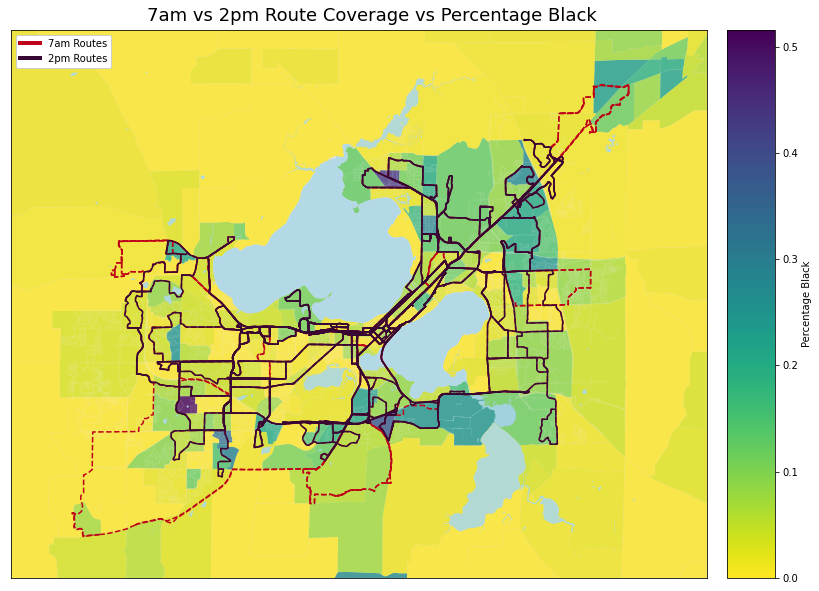

In [46]:
#suptitle = "Cars per Capita vs Route Frequency - Weekday, 2am"
#savefigName = 'PaperFigures/CarOwnershipVSfrequency2am'
colName1 = 'frequency_2pm'
colName2 = 'frequency_7am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='densityBlack', ax=ax, legend=True, legend_kwds={'label': "Percentage Black"}, cax=cax, cmap='viridis_r', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName2].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=1, linewidth=1.5, color='#be0119')
        
for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName1].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="-", alpha=1, linewidth=1.5, color='#380835')
        
        
custom_lines = [Line2D([0], [0], color='#be0119', lw=4), Line2D([0], [0], color='#380835', lw=4)]
ax.legend(custom_lines, ['7am Routes', '2pm Routes'], loc='upper left', framealpha=1)

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle("7am vs 2pm Route Coverage vs Percentage Black", fontsize=18, x=.55, y=.76)
#plt.savefig(savefigName, bbox_inches='tight')
plt.show()

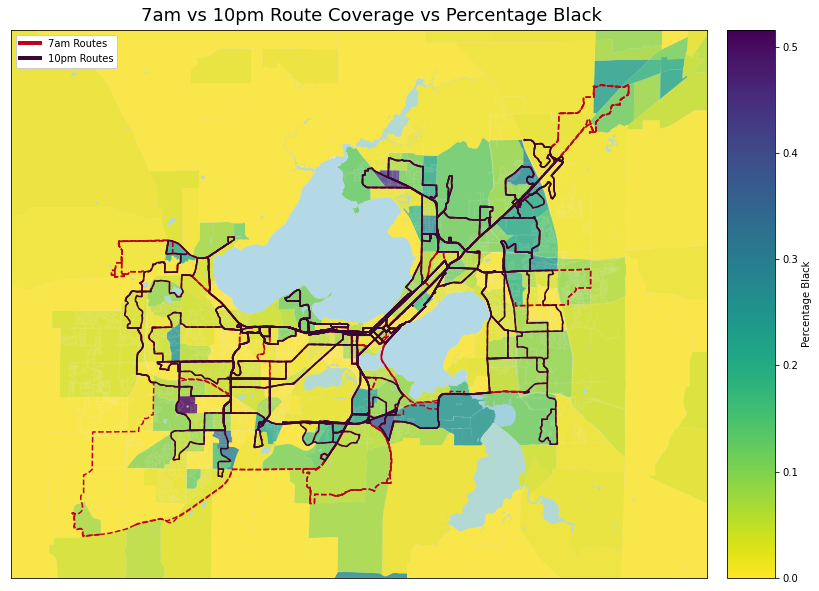

In [47]:
#suptitle = "Cars per Capita vs Route Frequency - Weekday, 2am"
#savefigName = 'PaperFigures/CarOwnershipVSfrequency2am'
colName1 = 'frequency_10pm'
colName2 = 'frequency_7am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='densityBlack', ax=ax, legend=True, legend_kwds={'label': "Percentage Black"}, cax=cax, cmap='viridis_r', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName2].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=1, linewidth=1.5, color='#be0119')
        
for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName1].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="-", alpha=1, linewidth=1.5, color='#380835')
        
        
custom_lines = [Line2D([0], [0], color='#be0119', lw=4), Line2D([0], [0], color='#380835', lw=4)]
ax.legend(custom_lines, ['7am Routes', '10pm Routes'], loc='upper left', framealpha=1)

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle("7am vs 10pm Route Coverage vs Percentage Black", fontsize=18, x=.55, y=.76)
#plt.savefig(savefigName, bbox_inches='tight')
plt.show()